In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
# load data 
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
housing = fetch_california_housing()

In [4]:
housing.data.shape, housing.target.shape

((20640, 8), (20640,))

In [5]:
housing.feature_names, housing.target_names

(['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 ['MedHouseVal'])

In [6]:
housing.data.dtype, housing.target.dtype

(dtype('float64'), dtype('float64'))

In [7]:
X, X_test, y, y_test = train_test_split(housing.data, housing.target, test_size=0.2,random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [8]:
X_train.shape[1:]

(8,)

In [9]:
import numpy as np
np.array([1,2,3]).shape

(3,)

In [10]:
# build model
model = keras.models.Sequential()
model.add(keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(1))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [12]:
# model.get_weights()

In [13]:
model.compile(loss="mean_squared_error", optimizer="sgd")

In [14]:
# train model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
413/413 [==============================] - 2s 2ms/step - loss: 1.1160 - val_loss: 12.4790
Epoch 2/20
413/413 [==============================] - 1s 2ms/step - loss: 7.7066 - val_loss: 0.6198
Epoch 3/20
413/413 [==============================] - 1s 2ms/step - loss: 0.4444 - val_loss: 0.4088
Epoch 4/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3853 - val_loss: 0.4228
Epoch 5/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3706 - val_loss: 0.3926
Epoch 6/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3629 - val_loss: 0.3946
Epoch 7/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3600 - val_loss: 0.3807
Epoch 8/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3579 - val_loss: 0.3779
Epoch 9/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3531 - val_loss: 0.3829
Epoch 10/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3517 - val_loss: 0.374

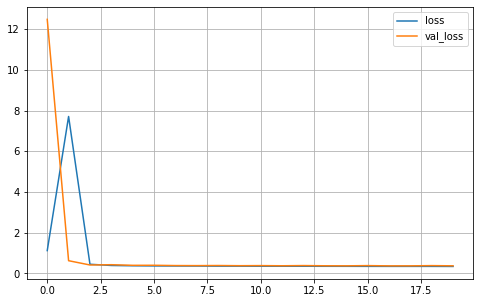

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [16]:
model.evaluate(X_test, y_test)

129/129 [==============================] - 0s 1ms/step - loss: 0.3551


0.35513994097709656

In [17]:
X_new, y_new = X_test[:3], y_test[:3]

In [18]:
y_new

array([0.477  , 0.458  , 5.00001])

In [19]:
y_pred = model.predict(X_new)
y_pred

array([[0.8274102],
       [1.7393379],
       [4.3778915]], dtype=float32)

In [20]:
# build wide & deep model 1
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [21]:
# build wide & deep model 1_2
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(100, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
output = keras.layers.Dense(1)(hidden2)
model = keras.Model(inputs=[input_], outputs=[output])

In [22]:
model.compile(loss="mean_squared_error", optimizer="sgd")

In [23]:
# train model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
413/413 [==============================] - 1s 2ms/step - loss: 0.6940 - val_loss: 0.4864
Epoch 2/20
413/413 [==============================] - 1s 2ms/step - loss: 0.4310 - val_loss: 0.4743
Epoch 3/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3940 - val_loss: 0.3972
Epoch 4/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3733 - val_loss: 0.3904
Epoch 5/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3596 - val_loss: 0.3821
Epoch 6/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3539 - val_loss: 0.3710
Epoch 7/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3453 - val_loss: 0.3696
Epoch 8/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3386 - val_loss: 0.3618
Epoch 9/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3362 - val_loss: 0.3577
Epoch 10/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3309 - val_loss: 0.3656

In [24]:
model.evaluate(X_test, y_test)

129/129 [==============================] - 0s 1ms/step - loss: 0.3204


0.32040587067604065

In [25]:
y_pred = model.predict(X_new)
y_pred

array([[0.78658116],
       [1.3481123 ],
       [4.2370534 ]], dtype=float32)

In [26]:
# build wide & deep model 2
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [27]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [28]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]

In [29]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
413/413 [==============================] - 1s 2ms/step - loss: 1.5692 - val_loss: 0.7645
Epoch 2/20
413/413 [==============================] - 1s 2ms/step - loss: 0.6560 - val_loss: 0.6508
Epoch 3/20
413/413 [==============================] - 1s 2ms/step - loss: 0.6007 - val_loss: 0.6137
Epoch 4/20
413/413 [==============================] - 1s 2ms/step - loss: 0.5699 - val_loss: 0.5825
Epoch 5/20
413/413 [==============================] - 1s 2ms/step - loss: 0.5457 - val_loss: 0.5587
Epoch 6/20
413/413 [==============================] - 1s 2ms/step - loss: 0.5256 - val_loss: 0.5433
Epoch 7/20
413/413 [==============================] - 1s 2ms/step - loss: 0.5091 - val_loss: 0.5243
Epoch 8/20
413/413 [==============================] - 1s 2ms/step - loss: 0.4955 - val_loss: 0.5119
Epoch 9/20
413/413 [==============================] - 1s 2ms/step - loss: 0.4840 - val_loss: 0.5015
Epoch 10/20
413/413 [==============================] - 1s 2ms/step - loss: 0.4748 - val_loss: 0.4932

In [30]:
model.evaluate((X_test_A, X_test_B), y_test)

129/129 [==============================] - 0s 2ms/step - loss: 0.4509


0.4508771002292633

In [31]:
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [32]:
y_pred = model.predict((X_new_A, X_new_B))
y_pred

array([[0.44889414],
       [1.9161514 ],
       [2.9835    ]], dtype=float32)

In [33]:
y_new

array([0.477  , 0.458  , 5.00001])